# **Internet va raqamli iqtisodiyot statistikasi**

## Kerakli kutubxonalarni o'rnatish


In [5]:
!pip install wbdata

# Kutubxonalarni import qilamiz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wbdata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import datetime
import seaborn as sns

# Stil sozlamalari
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1-bosqich: Ma'lumotlarni yuklash va tozalash

In [6]:
print("Internet va raqamli iqtisodiyot statistikasi")
print("=" * 50)

# Namuna ma'lumotlar yaratamiz (real ma'lumotlar olish muammoli bo'lsa)
def create_sample_data():
    """Namuna ma'lumotlar yaratish"""
    years = list(range(2010, 2023))
    countries = ['O\'zbekiston', 'Qozog\'iston', 'Rossiya', 'Xitoy', 'AQSh', 'Koreya']

    np.random.seed(42)
    sample_data = []

    for country in countries:
        # Har bir mamlakat uchun boshlang'ich qiymatlar
        base_internet = np.random.uniform(10, 80)
        base_mobile = np.random.uniform(50, 120)
        base_gdp = np.random.uniform(1000, 40000)
        base_services = np.random.uniform(40, 75)
        base_it_export = np.random.uniform(1e6, 1e8)

        for year in years:
            # Yillik o'sish
            growth = (year - 2010) * 0.05

            internet_users = base_internet * (1 + growth) + np.random.normal(0, 2)
            mobile_subs = base_mobile * (1 + growth * 0.8) + np.random.normal(0, 3)
            gdp_per_capita = base_gdp * (1 + growth * 0.1) + np.random.normal(0, 100)
            services_share = base_services * (1 + growth * 0.02) + np.random.normal(0, 1)
            it_export = base_it_export * (1 + growth * 0.15) + np.random.normal(0, 10000)

            sample_data.append({
                'Mamlakat': country,
                'Yil': year,
                'Internet foydalanuvchilari (%)': max(0, min(100, internet_users)),
                'Mobil abonentlar (100 kishiga)': max(0, mobile_subs),
                'Aholi jon boshiga YaIM': max(0, gdp_per_capita),
                'Xizmat ko\'rsatish ulushi YaIMda': max(0, min(100, services_share)),
                'IT xizmatlari eksporti': max(0, it_export)
            })

    return pd.DataFrame(sample_data)

# Ma'lumotlarni yaratamiz
print("Ma'lumotlar yaratilmoqda...")
internet_data = create_sample_data()

# Ma'lumotlarni ko'rib chiqamiz
print(f"Ma'lumotlar hajmi: {internet_data.shape}")
print("\nBirinchi 10 qator:")
print(internet_data.head(10))

print(f"\nMamlakatlar: {internet_data['Mamlakat'].unique().tolist()}")
print(f"Yillar: {internet_data['Yil'].min()} - {internet_data['Yil'].max()}")

# Asosiy statistik ko'rsatkichlar
print("\nAsosiy statistik ko'rsatkichlar:")
print(internet_data.describe().round(2))

Internet va raqamli iqtisodiyot statistikasi
Ma'lumotlar yaratilmoqda...
Ma'lumotlar hajmi: (78, 7)

Birinchi 10 qator:
      Mamlakat   Yil  Internet foydalanuvchilari (%)  \
0  O'zbekiston  2010                       36.775891   
1  O'zbekiston  2011                       36.180533   
2  O'zbekiston  2012                       38.983497   
3  O'zbekiston  2013                       42.845921   
4  O'zbekiston  2014                       42.260862   
5  O'zbekiston  2015                       44.948750   
6  O'zbekiston  2016                       44.552913   
7  O'zbekiston  2017                       50.657563   
8  O'zbekiston  2018                       48.011575   
9  O'zbekiston  2019                       54.291319   

   Mobil abonentlar (100 kishiga)  Aholi jon boshiga YaIM  \
0                      119.581547            29489.675917   
1                      113.374354            29790.539518   
2                      123.646781            29772.906988   
3                  

## 2-bosqich: Eksplorativ ma'lumotlar tahlili (EDA)

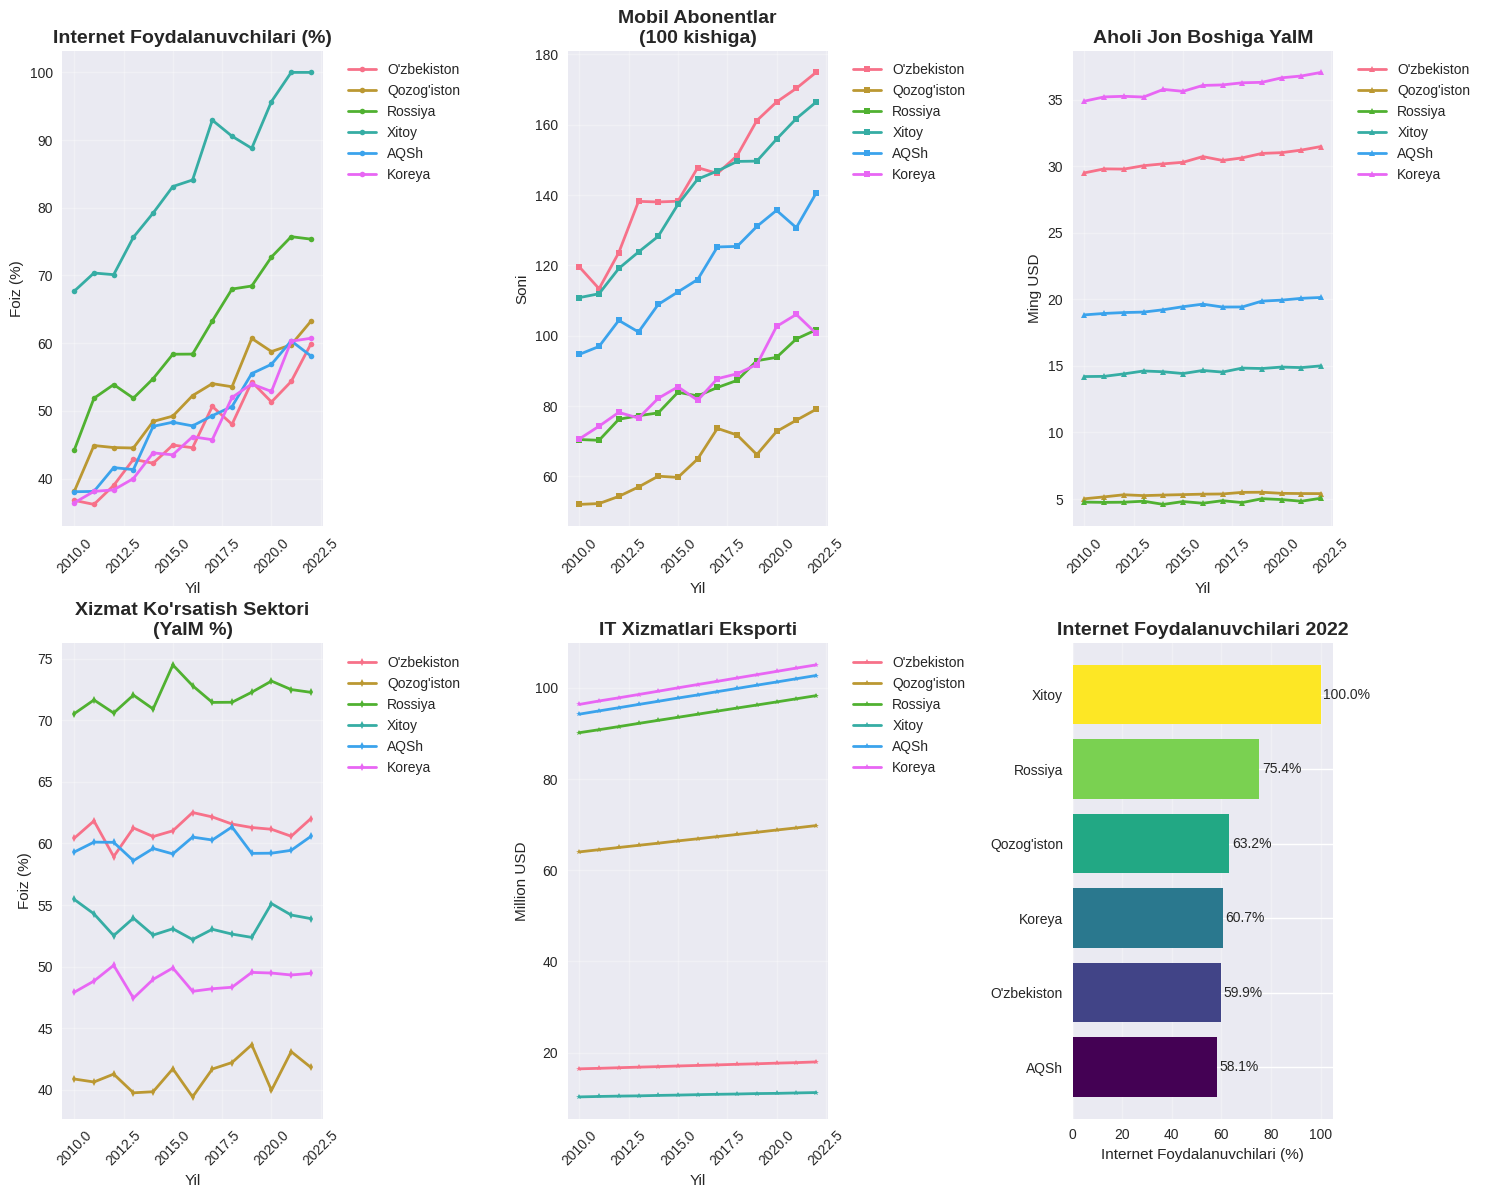

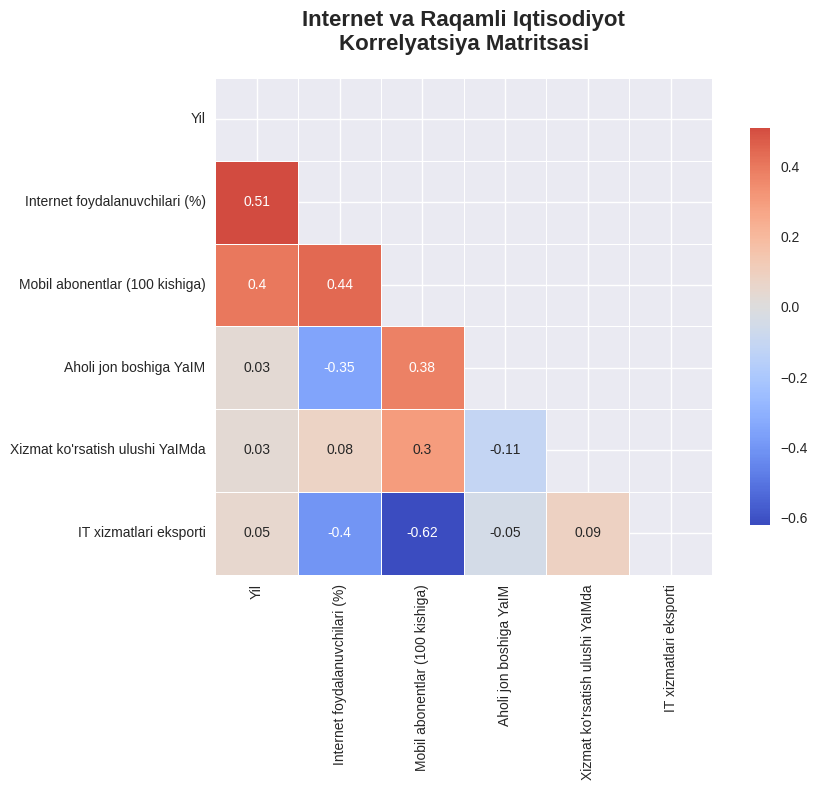

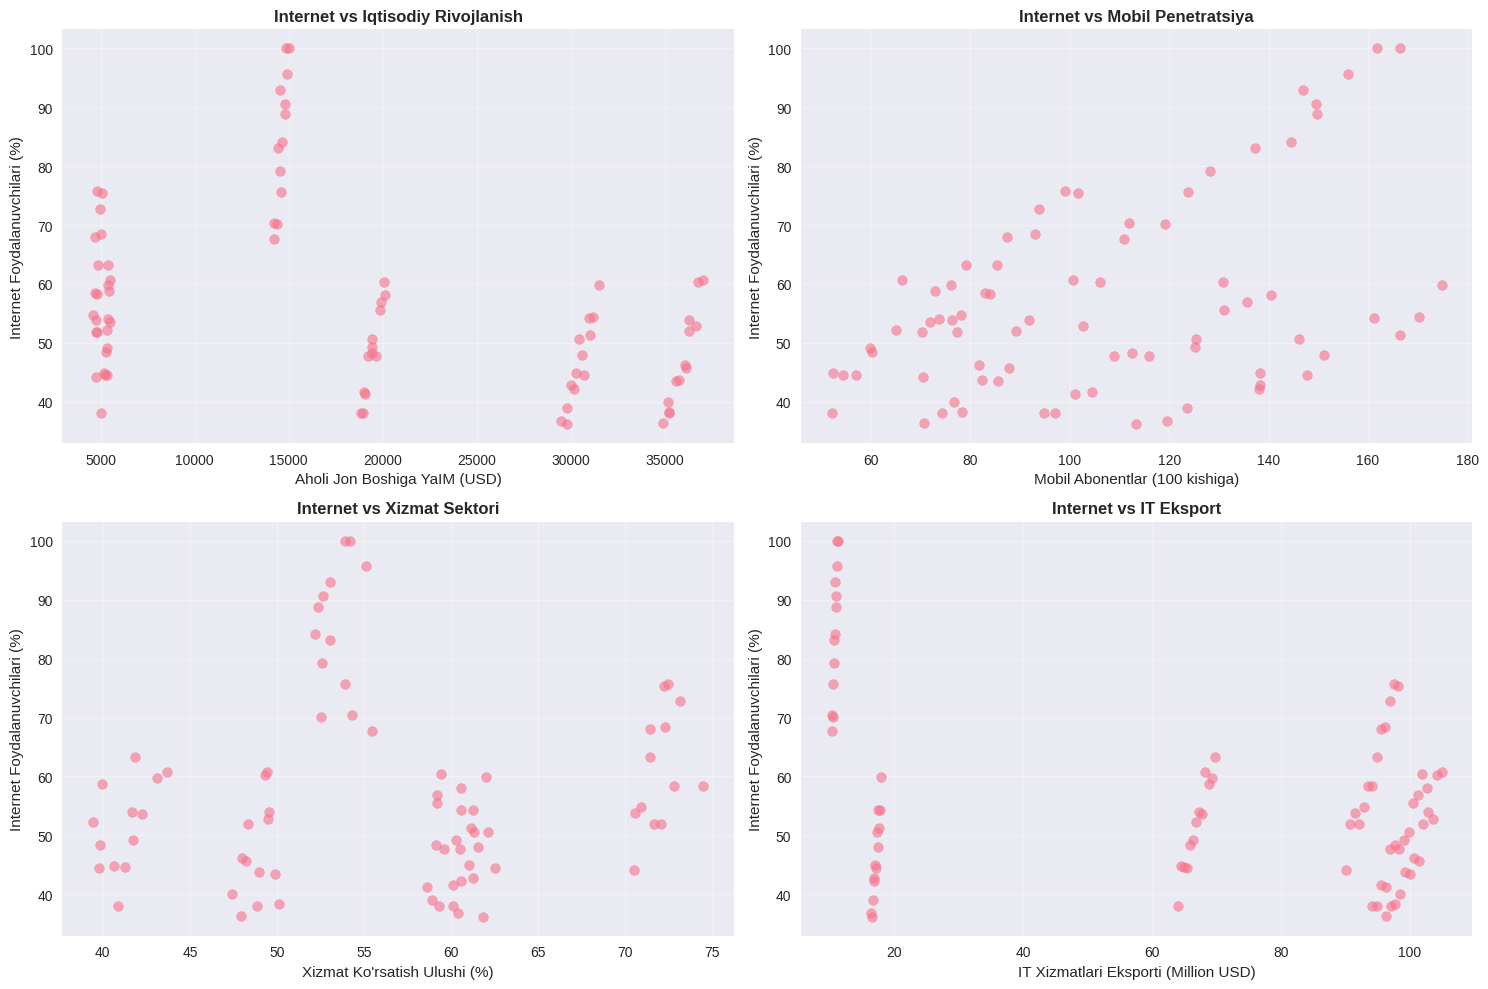

In [7]:
# Internet tendensiyalari
plt.figure(figsize=(15, 12))

# 1. Internet foydalanuvchilari tendensiyasi
plt.subplot(2, 3, 1)
for country in internet_data['Mamlakat'].unique():
    country_data = internet_data[internet_data['Mamlakat'] == country]
    plt.plot(country_data['Yil'], country_data['Internet foydalanuvchilari (%)'],
             marker='o', linewidth=2, label=country, markersize=4)
plt.title('Internet Foydalanuvchilari (%)', fontsize=14, fontweight='bold')
plt.xlabel('Yil')
plt.ylabel('Foiz (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 2. Mobil abonentlar tendensiyasi
plt.subplot(2, 3, 2)
for country in internet_data['Mamlakat'].unique():
    country_data = internet_data[internet_data['Mamlakat'] == country]
    plt.plot(country_data['Yil'], country_data['Mobil abonentlar (100 kishiga)'],
             marker='s', linewidth=2, label=country, markersize=4)
plt.title('Mobil Abonentlar\n(100 kishiga)', fontsize=14, fontweight='bold')
plt.xlabel('Yil')
plt.ylabel('Soni')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 3. Aholi jon boshiga YaIM
plt.subplot(2, 3, 3)
for country in internet_data['Mamlakat'].unique():
    country_data = internet_data[internet_data['Mamlakat'] == country]
    plt.plot(country_data['Yil'], country_data['Aholi jon boshiga YaIM']/1000,
             marker='^', linewidth=2, label=country, markersize=4)
plt.title('Aholi Jon Boshiga YaIM', fontsize=14, fontweight='bold')
plt.xlabel('Yil')
plt.ylabel('Ming USD')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 4. Xizmat ko'rsatish ulushi
plt.subplot(2, 3, 4)
for country in internet_data['Mamlakat'].unique():
    country_data = internet_data[internet_data['Mamlakat'] == country]
    plt.plot(country_data['Yil'], country_data['Xizmat ko\'rsatish ulushi YaIMda'],
             marker='d', linewidth=2, label=country, markersize=4)
plt.title('Xizmat Ko\'rsatish Sektori\n(YaIM %)', fontsize=14, fontweight='bold')
plt.xlabel('Yil')
plt.ylabel('Foiz (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 5. IT xizmatlari eksporti
plt.subplot(2, 3, 5)
for country in internet_data['Mamlakat'].unique():
    country_data = internet_data[internet_data['Mamlakat'] == country]
    plt.plot(country_data['Yil'], country_data['IT xizmatlari eksporti']/1e6,
             marker='*', linewidth=2, label=country, markersize=4)
plt.title('IT Xizmatlari Eksporti', fontsize=14, fontweight='bold')
plt.xlabel('Yil')
plt.ylabel('Million USD')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 6. So'nggi yil solishtirmasi
plt.subplot(2, 3, 6)
latest_year = internet_data['Yil'].max()
latest_data = internet_data[internet_data['Yil'] == latest_year]

countries_ordered = latest_data.sort_values('Internet foydalanuvchilari (%)')['Mamlakat']
values_ordered = latest_data.sort_values('Internet foydalanuvchilari (%)')['Internet foydalanuvchilari (%)']

bars = plt.barh(range(len(countries_ordered)), values_ordered,
                color=plt.cm.viridis(np.linspace(0, 1, len(countries_ordered))))
plt.yticks(range(len(countries_ordered)), countries_ordered)
plt.title(f'Internet Foydalanuvchilari {latest_year}', fontsize=14, fontweight='bold')
plt.xlabel('Internet Foydalanuvchilari (%)')
plt.grid(True, alpha=0.3, axis='x')

# Qiymatlarni diagrammada ko'rsatamiz
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

# Korrelyatsiya matritsasi
plt.figure(figsize=(10, 8))
corr_matrix = internet_data.select_dtypes(include=[np.number]).corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Internet va Raqamli Iqtisodiyot\nKorrelyatsiya Matritsasi',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Bog'liqlik diagrammalari
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Internet vs YaIM
axes[0,0].scatter(internet_data['Aholi jon boshiga YaIM'],
                  internet_data['Internet foydalanuvchilari (%)'],
                  alpha=0.6, s=50)
axes[0,0].set_xlabel('Aholi Jon Boshiga YaIM (USD)')
axes[0,0].set_ylabel('Internet Foydalanuvchilari (%)')
axes[0,0].set_title('Internet vs Iqtisodiy Rivojlanish', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Internet vs Mobil abonentlar
axes[0,1].scatter(internet_data['Mobil abonentlar (100 kishiga)'],
                  internet_data['Internet foydalanuvchilari (%)'],
                  alpha=0.6, s=50)
axes[0,1].set_xlabel('Mobil Abonentlar (100 kishiga)')
axes[0,1].set_ylabel('Internet Foydalanuvchilari (%)')
axes[0,1].set_title('Internet vs Mobil Penetratsiya', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Internet vs Xizmat ko'rsatish
axes[1,0].scatter(internet_data['Xizmat ko\'rsatish ulushi YaIMda'],
                  internet_data['Internet foydalanuvchilari (%)'],
                  alpha=0.6, s=50)
axes[1,0].set_xlabel('Xizmat Ko\'rsatish Ulushi (%)')
axes[1,0].set_ylabel('Internet Foydalanuvchilari (%)')
axes[1,0].set_title('Internet vs Xizmat Sektori', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Internet vs IT eksport
axes[1,1].scatter(internet_data['IT xizmatlari eksporti']/1e6,
                  internet_data['Internet foydalanuvchilari (%)'],
                  alpha=0.6, s=50)
axes[1,1].set_xlabel('IT Xizmatlari Eksporti (Million USD)')
axes[1,1].set_ylabel('Internet Foydalanuvchilari (%)')
axes[1,1].set_title('Internet vs IT Eksport', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3-bosqich: Regressiya modellarini yaratish (O'zbekiston uchun)

In [8]:
# O'zbekiston ma'lumotlarini ajratib olamiz
uzbekistan_data = internet_data[internet_data['Mamlakat'] == 'O\'zbekiston']

print("O'zbekiston ma'lumotlari:")
print(f"Ma'lumotlar hajmi: {uzbekistan_data.shape}")
print(f"Yillar: {uzbekistan_data['Yil'].min()} - {uzbekistan_data['Yil'].max()}")

# Model uchun xususiyatlarni aniqlaymiz
features = [
    'Mobil abonentlar (100 kishiga)',
    'Aholi jon boshiga YaIM',
    'Xizmat ko\'rsatish ulushi YaIMda',
    'IT xizmatlari eksporti'
]

target = 'Internet foydalanuvchilari (%)'

X = uzbekistan_data[features]
y = uzbekistan_data[target]

print(f"\nModel xususiyatlari: {features}")
print(f"Maqsadli o'zgaruvchi: {target}")
print(f"X o'lchami: {X.shape}")
print(f"y o'lchami: {y.shape}")

# Ma'lumotlarni trenirovka va test qismlariga ajratamiz
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=False)

print(f"\nTrenirovka ma'lumotlari: {X_train.shape}")
print(f"Test ma'lumotlari: {X_test.shape}")

# Modellarni yaratamiz
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modellarni trenirovka qilamiz
print("\nModellar trenirovka qilinmoqda...")
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Prognozlar qilamiz
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

O'zbekiston ma'lumotlari:
Ma'lumotlar hajmi: (13, 7)
Yillar: 2010 - 2022

Model xususiyatlari: ['Mobil abonentlar (100 kishiga)', 'Aholi jon boshiga YaIM', "Xizmat ko'rsatish ulushi YaIMda", 'IT xizmatlari eksporti']
Maqsadli o'zgaruvchi: Internet foydalanuvchilari (%)
X o'lchami: (13, 4)
y o'lchami: (13,)

Trenirovka ma'lumotlari: (9, 4)
Test ma'lumotlari: (4, 4)

Modellar trenirovka qilinmoqda...


## 4-bosqich: Modellarni baholash

=== INTERNET FOYDALANUVCHILARI PROGNOZ MODELLARI ===
Linear Regression natijalari:
  MSE: 12.78
  RMSE: 3.57
  MAE: 3.14
  R²: -0.3278
----------------------------------------
Random Forest natijalari:
  MSE: 57.02
  RMSE: 7.55
  MAE: 6.99
  R²: -4.9245
----------------------------------------

Eng yaxshi model: Linear Regression


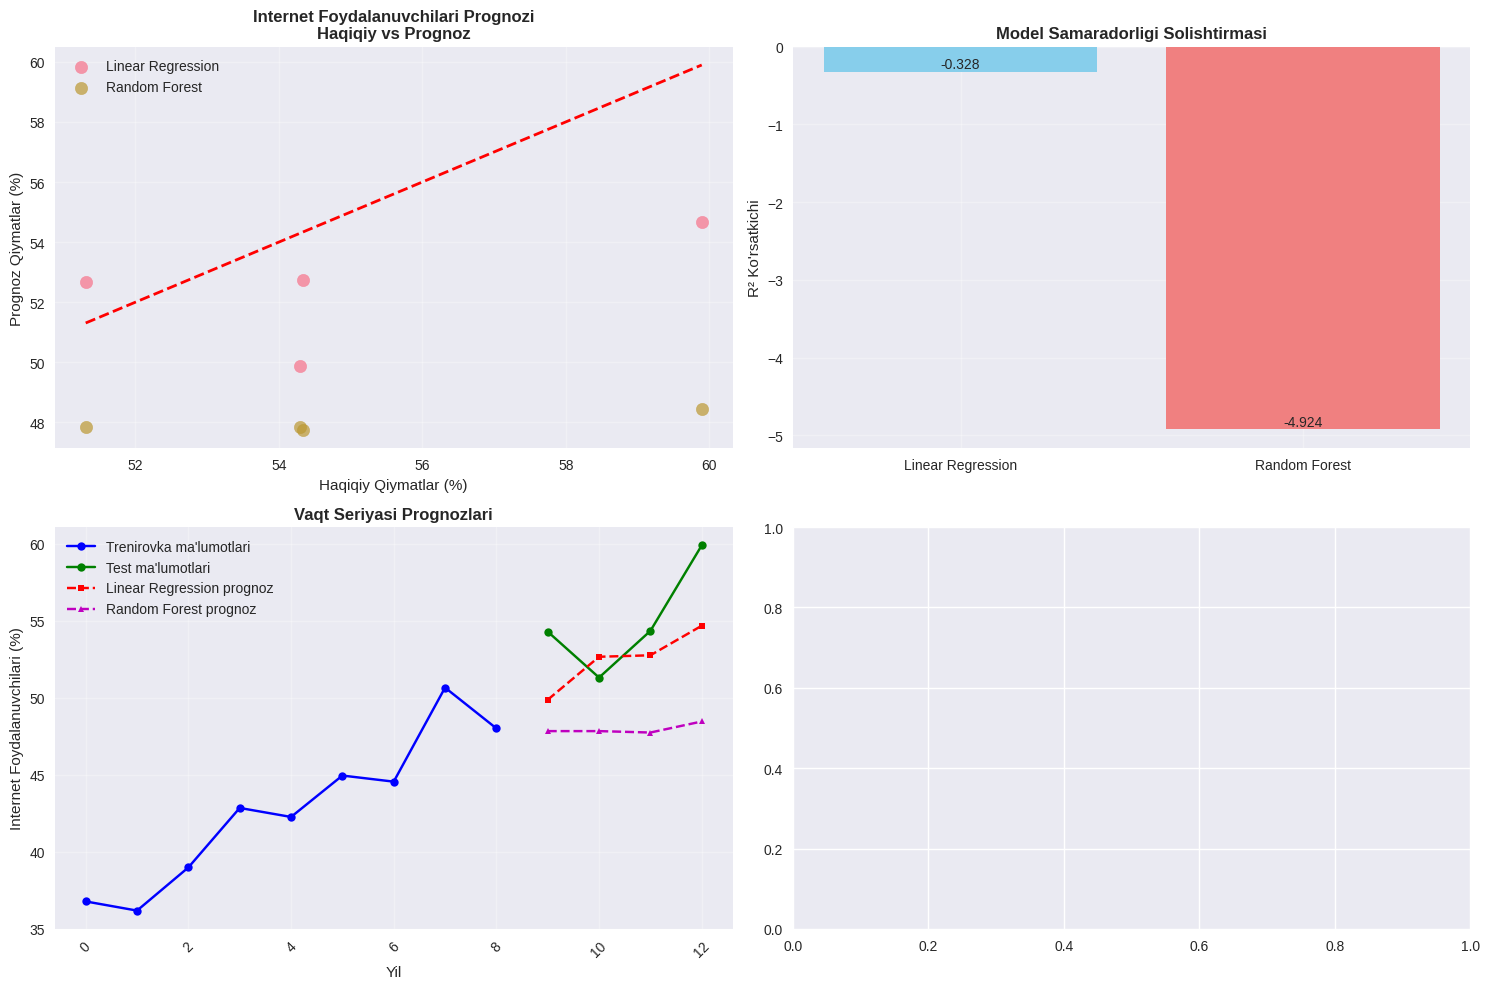

In [9]:
def evaluate_model(y_true, y_pred, model_name):
    """Modelni baholash funksiyasi"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} natijalari:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.4f}")
    print("-" * 40)

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

print("=== INTERNET FOYDALANUVCHILARI PROGNOZ MODELLARI ===")
lr_results = evaluate_model(y_test, lr_pred, "Linear Regression")
rf_results = evaluate_model(y_test, rf_pred, "Random Forest")

# Eng yaxshi modelni tanlaymiz
best_model = rf_model if rf_results['R²'] > lr_results['R²'] else lr_model
best_model_name = "Random Forest" if best_model == rf_model else "Linear Regression"

print(f"\nEng yaxshi model: {best_model_name}")

# Xususiyatlarning ahamiyati
if best_model == rf_model:
    feature_importance = pd.DataFrame({
        'Xususiyat': features,
        'Ahamiyat': rf_model.feature_importances_
    }).sort_values('Ahamiyat', ascending=False)

    print("\nXususiyatlarning ahamiyati:")
    print(feature_importance)

# Natijalarni vizualizatsiya qilish
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Haqiqiy vs prognoz qilingan qiymatlar
axes[0,0].scatter(y_test, lr_pred, alpha=0.7, s=80, label='Linear Regression')
axes[0,0].scatter(y_test, rf_pred, alpha=0.7, s=80, label='Random Forest')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Haqiqiy Qiymatlar (%)')
axes[0,0].set_ylabel('Prognoz Qiymatlar (%)')
axes[0,0].set_title('Internet Foydalanuvchilari Prognozi\nHaqiqiy vs Prognoz', fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Model solishtirmasi
models = ['Linear Regression', 'Random Forest']
r2_scores = [lr_results['R²'], rf_results['R²']]
bars = axes[0,1].bar(models, r2_scores, color=['skyblue', 'lightcoral'])
axes[0,1].set_ylabel('R² Ko\'rsatkichi')
axes[0,1].set_title('Model Samaradorligi Solishtirmasi', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Qiymatlarni diagrammada ko'rsatamiz
for bar in bars:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom')

# Vaqt seriyasi prognozlari
train_years = X_train.index
test_years = X_test.index

axes[1,0].plot(train_years, y_train, 'bo-', label='Trenirovka ma\'lumotlari', markersize=6)
axes[1,0].plot(test_years, y_test, 'go-', label='Test ma\'lumotlari', markersize=6)
axes[1,0].plot(test_years, lr_pred, 'r--s', label='Linear Regression prognoz', markersize=4)
axes[1,0].plot(test_years, rf_pred, 'm--^', label='Random Forest prognoz', markersize=4)
axes[1,0].set_xlabel('Yil')
axes[1,0].set_ylabel('Internet Foydalanuvchilari (%)')
axes[1,0].set_title('Vaqt Seriyasi Prognozlari', fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].tick_params(axis='x', rotation=45)

# Xususiyatlarning ahamiyati
if best_model == rf_model:
    features_plot = feature_importance['Xususiyat']
    importance_plot = feature_importance['Ahamiyat']
    bars = axes[1,1].barh(features_plot, importance_plot, color=plt.cm.Set3(np.linspace(0, 1, len(features_plot))))
    axes[1,1].set_xlabel('Ahamiyat')
    axes[1,1].set_title('Xususiyatlarning Ahamiyati\n(Random Forest)', fontweight='bold')
    axes[1,1].grid(True, alpha=0.3, axis='x')

    # Qiymatlarni diagrammada ko'rsatamiz
    for bar in bars:
        width = bar.get_width()
        axes[1,1].text(width + 0.01, bar.get_y() + bar.get_height()/2,
                      f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

## 5-bosqich: Kelajak prognozlari

Oxirgi yil ma'lumotlari:
  Mobil abonentlar (100 kishiga): 174.88
  Aholi jon boshiga YaIM: 31470.17
  Xizmat ko'rsatish ulushi YaIMda: 62.02
  IT xizmatlari eksporti: 17959694.45

Yillik o'rtacha o'sish sur'atlari:
  Mobil abonentlar (100 kishiga): 4.2538
  Aholi jon boshiga YaIM: 152.3459
  Xizmat ko'rsatish ulushi YaIMda: 0.1227
  IT xizmatlari eksporti: 116889.4500

=== 2023-2027 YILLARI UCHUN INTERNET FOYDALANUVCHILARI PROGNOZLARI ===
      Prognoz internet foydalanuvchilari  O'sish
Yil                                             
2023                               55.99   -3.91
2024                               57.30   -2.60
2025                               58.61   -1.28
2026                               59.92    0.03
2027                               61.23    1.34


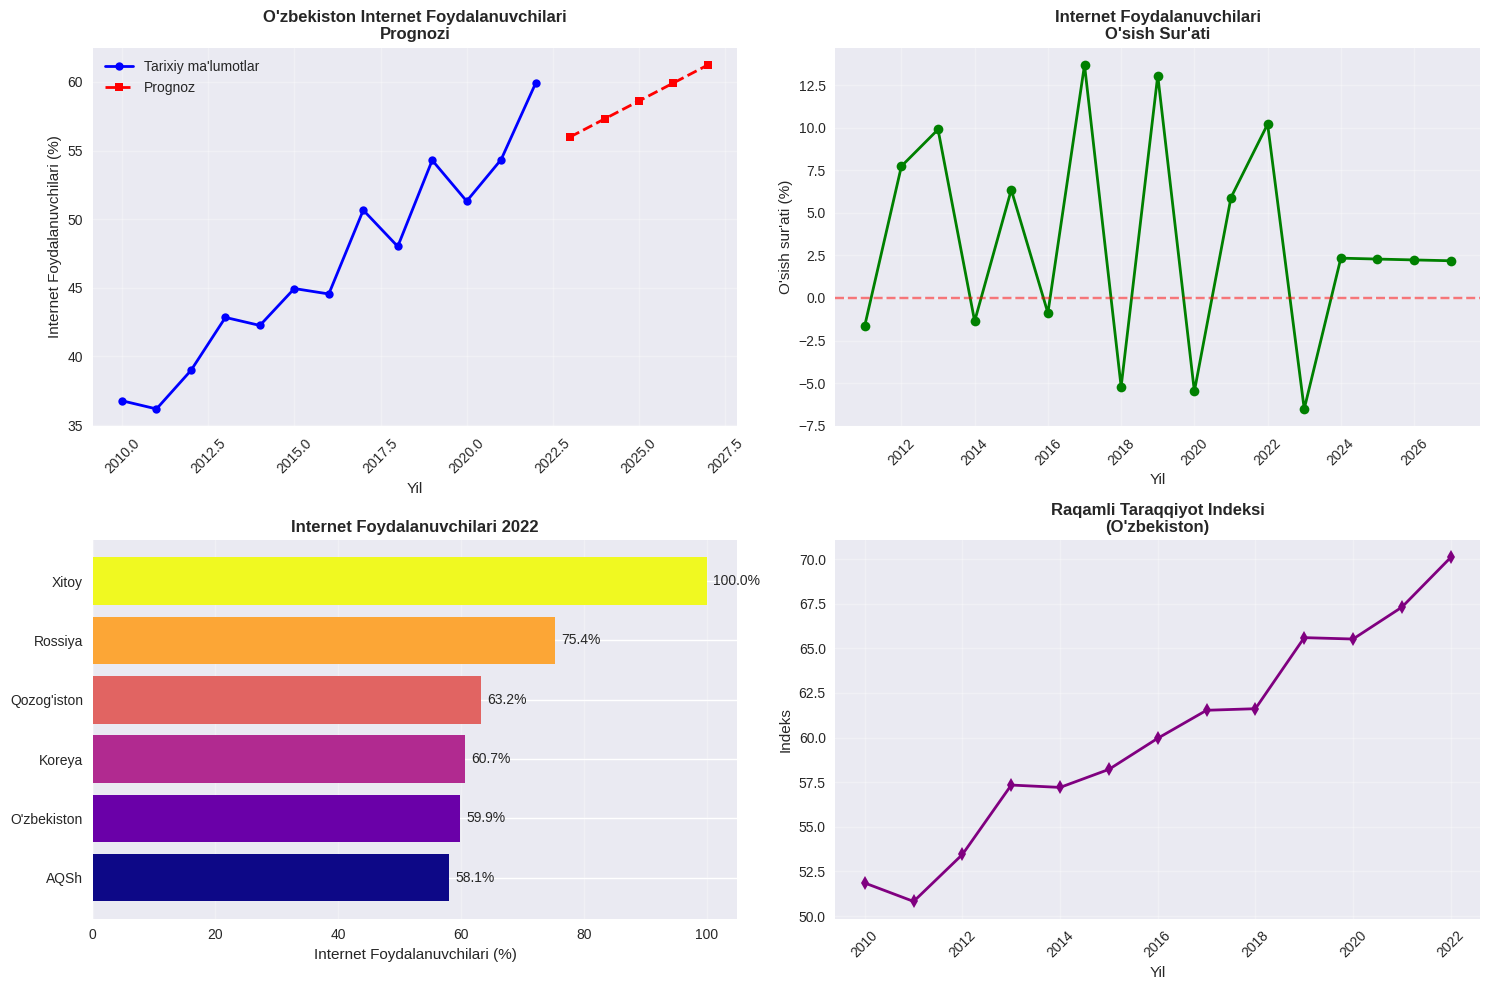

In [10]:
# Oxirgi yil ma'lumotlarini olamiz
last_year_data = uzbekistan_data[features].iloc[-1:].copy()

print("Oxirgi yil ma'lumotlari:")
for feature in features:
    print(f"  {feature}: {last_year_data[feature].iloc[0]:.2f}")

# Tarixiy o'rtacha o'sish sur'atlarini hisoblaymiz
historical_growth = {}
for feature in features:
    growth = (uzbekistan_data[feature].iloc[-1] - uzbekistan_data[feature].iloc[0]) / len(uzbekistan_data)
    historical_growth[feature] = growth

print("\nYillik o'rtacha o'sish sur'atlari:")
for feature, growth in historical_growth.items():
    print(f"  {feature}: {growth:.4f}")

# Kelajak prognozlari
future_years = 5
future_predictions = []
future_data = []

current_data = last_year_data.copy()

for year in range(1, future_years + 1):
    # Ma'lumotlarni yangilaymiz
    for feature in current_data.columns:
        current_data[feature] = current_data[feature] + historical_growth[feature]

    # Internet foydalanuvchilarini prognoz qilamiz
    predicted_internet_users = best_model.predict(current_data)[0]
    future_predictions.append(predicted_internet_users)

    # Kelajak ma'lumotlarini saqlaymiz
    future_data.append({
        'Yil': uzbekistan_data['Yil'].max() + year,
        'Prognoz internet foydalanuvchilari': predicted_internet_users,
        'O\'sish': predicted_internet_users - uzbekistan_data[target].iloc[-1]
    })

# Prognoz natijalarini ko'rsatamiz
future_df = pd.DataFrame(future_data)
future_df = future_df.set_index('Yil')

print("\n=== 2023-2027 YILLARI UCHUN INTERNET FOYDALANUVCHILARI PROGNOZLARI ===")
display_df = future_df.copy()
display_df['Prognoz internet foydalanuvchilari'] = display_df['Prognoz internet foydalanuvchilari'].round(2)
display_df['O\'sish'] = display_df['O\'sish'].round(2)

print(display_df)

# Tarixiy ma'lumotlar va prognozlarni vizualizatsiya qilish
plt.figure(figsize=(15, 10))

# 1. Internet foydalanuvchilari prognozi
plt.subplot(2, 2, 1)
historical_years = uzbekistan_data['Yil']
plt.plot(historical_years, uzbekistan_data[target],
         'b-o', linewidth=2, label='Tarixiy ma\'lumotlar', markersize=6)
future_years_list = future_df.index
plt.plot(future_years_list, future_predictions,
         'r--s', linewidth=2, label='Prognoz', markersize=6)
plt.title('O\'zbekiston Internet Foydalanuvchilari\nPrognozi', fontweight='bold')
plt.xlabel('Yil')
plt.ylabel('Internet Foydalanuvchilari (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 2. O'sish sur'ati
plt.subplot(2, 2, 2)
all_years = list(historical_years) + list(future_years_list)
all_internet_users = list(uzbekistan_data[target]) + future_predictions

growth_rates = []
for i in range(1, len(all_internet_users)):
    growth_rate = ((all_internet_users[i] - all_internet_users[i-1]) / all_internet_users[i-1]) * 100
    growth_rates.append(growth_rate)

plt.plot(all_years[1:], growth_rates, 'green', linewidth=2, marker='o')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.title('Internet Foydalanuvchilari\nO\'sish Sur\'ati', fontweight='bold')
plt.xlabel('Yil')
plt.ylabel('O\'sish sur\'ati (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 3. Mamlakatlar solishtirmasi (so'nggi yil)
plt.subplot(2, 2, 3)
latest_year = internet_data['Yil'].max()
latest_data = internet_data[internet_data['Yil'] == latest_year]

countries_ordered = latest_data.sort_values('Internet foydalanuvchilari (%)')['Mamlakat']
values_ordered = latest_data.sort_values('Internet foydalanuvchilari (%)')['Internet foydalanuvchilari (%)']

bars = plt.barh(range(len(countries_ordered)), values_ordered,
                color=plt.cm.plasma(np.linspace(0, 1, len(countries_ordered))))
plt.yticks(range(len(countries_ordered)), countries_ordered)
plt.title(f'Internet Foydalanuvchilari {latest_year}', fontweight='bold')
plt.xlabel('Internet Foydalanuvchilari (%)')
plt.grid(True, alpha=0.3, axis='x')

# Qiymatlarni diagrammada ko'rsatamiz
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left', va='center')

# 4. Raqamli taraqqiyot indeksi
plt.subplot(2, 2, 4)
# Oddiy raqamli taraqqiyot indeksini hisoblaymiz
digital_index = (uzbekistan_data['Internet foydalanuvchilari (%)'] / 100 +
                 uzbekistan_data['Mobil abonentlar (100 kishiga)'] / 200 +
                 uzbekistan_data['Aholi jon boshiga YaIM'] / 50000) / 3 * 100

plt.plot(historical_years, digital_index, 'purple', linewidth=2, marker='d')
plt.title('Raqamli Taraqqiyot Indeksi\n(O\'zbekiston)', fontweight='bold')
plt.xlabel('Yil')
plt.ylabel('Indeks')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 6-bosqich: Xulosa va takliflar

In [11]:
print("=== INTERNET VA RAQAMLI IQTISODIYOT STATISTIKASI XULOSASI ===")
print("=" * 65)

# Model natijalari
print(f"\n📊 MODEL NATIJALARI:")
print(f"   • Eng yaxshi model: {best_model_name}")
print(f"   • Model aniqligi (R²): {max(lr_results['R²'], rf_results['R²']):.4f}")

# O'zbekiston holati
print(f"\n🇺🇿 O'ZBEKISTON RAQAMLI IQTISODIYOTI:")
current_internet = uzbekistan_data[target].iloc[-1]
current_mobile = uzbekistan_data['Mobil abonentlar (100 kishiga)'].iloc[-1]
current_gdp = uzbekistan_data['Aholi jon boshiga YaIM'].iloc[-1]

print(f"   • Internet foydalanuvchilari: {current_internet:.1f}%")
print(f"   • Mobil abonentlar: {current_mobile:.1f} (100 kishiga)")
print(f"   • Aholi jon boshiga YaIM: ${current_gdp:.0f}")
print(f"   • Xizmat ko'rsatish ulushi: {uzbekistan_data['Xizmat ko\'rsatish ulushi YaIMda'].iloc[-1]:.1f}%")

# Mintaqaviy solishtirish
print(f"\n📈 MINTAQAVIY SOLISHTIRISH:")
latest_year = internet_data['Yil'].max()
for country in ['O\'zbekiston', 'Qozog\'iston', 'Rossiya']:
    country_data = internet_data[internet_data['Mamlakat'] == country]
    latest_value = country_data[country_data['Yil'] == latest_year][target].iloc[0]
    print(f"   • {country}: {latest_value:.1f}%")

# Kelajak prognozlari
print(f"\n🔮 2027 YILIGA BO'LGAN PROGNOZLAR:")
current_internet = uzbekistan_data[target].iloc[-1]
predicted_2027 = future_predictions[-1]
growth_5_years = predicted_2027 - current_internet
yearly_growth_rate = (growth_5_years / current_internet) * 100 / 5

print(f"   • Joriy internet foydalanuvchilari: {current_internet:.1f}%")
print(f"   • Prognoz internet foydalanuvchilari: {predicted_2027:.1f}%")
print(f"   • 5 yillik o'sish: +{growth_5_years:.1f}%")
print(f"   • Yillik o'sish sur'ati: {yearly_growth_rate:.1f}%")

# Asosiy muammolar va imkoniyatlar
print(f"\n⚠️  ASOSIY MUAMMOLAR:")
print("   • Shahar-qishloq raqamli tafovuti")
print("   • Yuqori tezlikdagi internet qamrovining cheklanganligi")
print("   • Raqamli savodxonlik darajasining pastligi")
print("   • IT mutaxassislarining yetishmasligi")
print("   • Kiberxavfsizlik muammolari")

print(f"\n💡 RAQAMLI IQTISODIYOTNI RIVOJLANTIRISH BO'YICHA TAKLIFLAR:")

print("1. 🌐 Internet infratuzilmasini kengaytirish")
print("   - 5G tarmoqlarini joriy etish")
print("   - Qishloq joylarda internet qamrovini oshirish")
print("   - Internet tezligi va sifatiini yaxshilash")

print("2. 💻 Raqamli savodxonlikni oshirish")
print("   - Maktablarda IT ta'limini kuchaytirish")
print("   - Kattalar uchun raqamli savodxonlik kurslari")
print("   - Onlayn ta'lim platformalarini rivojlantirish")

print("3. 🏛️ Raqamli hukumat xizmatlari")
print("   - Davlat xizmatlarini raqamlashtirish")
print("   - Open data platformalarini yaratish")
print("   - Raqamli identifikatsiya tizimini joriy etish")

print("4. 💰 IT sohasini moliyaviy qo'llab-quvvatlash")
print("   - Startap va texnoparklar uchun imtiyozlar")
print("   - IT kompaniyalar uchun soliq imtiyozlari")
print("   - Venture kapitalni jalb qilish")

print("5. 🔐 Kiberxavfsizlikni mustahkamlash")
print("   - Milliy kiberxavfsizlik strategiyasi")
print("   - Xavfsiz server infratuzilmasi")
print("   - Kiberxavfsizlik bo'yicha malaka oshirish")

print(f"\n🎯 O'ZBEKISTON UCHUN ASOSIY MAQSADLAR:")
print("   2027 yilga bo'lgan maqsadlar:")
print("   • Internet foydalanuvchilari: 80%+")
print("   • Mobil internet qamrovi: 95%+")
print("   • Raqamli iqtisodiyot ulushi: 8%+")
print("   • IT eksporti: 500 million USD+")

print(f"\n✅ XULOSA:")
print("   O'zbekiston raqamli iqtisodiyotda jadal sur'atlar bilan rivojlanmoqda.")
print("   Internet foydalanuvchilari soni barqaror o'sishda davom etmoqda.")
print("   Kelajakda infratuzilma, ta'lim va innovatsiyaga sarmoya kiritish")
print("   orqali raqamli iqtisodiyotni yanada rivojlantirish mumkin.")

print("\n" + "=" * 65)

=== INTERNET VA RAQAMLI IQTISODIYOT STATISTIKASI XULOSASI ===

📊 MODEL NATIJALARI:
   • Eng yaxshi model: Linear Regression
   • Model aniqligi (R²): -0.3278

🇺🇿 O'ZBEKISTON RAQAMLI IQTISODIYOTI:
   • Internet foydalanuvchilari: 59.9%
   • Mobil abonentlar: 174.9 (100 kishiga)
   • Aholi jon boshiga YaIM: $31470
   • Xizmat ko'rsatish ulushi: 62.0%

📈 MINTAQAVIY SOLISHTIRISH:
   • O'zbekiston: 59.9%
   • Qozog'iston: 63.2%
   • Rossiya: 75.4%

🔮 2027 YILIGA BO'LGAN PROGNOZLAR:
   • Joriy internet foydalanuvchilari: 59.9%
   • Prognoz internet foydalanuvchilari: 61.2%
   • 5 yillik o'sish: +1.3%
   • Yillik o'sish sur'ati: 0.4%

⚠️  ASOSIY MUAMMOLAR:
   • Shahar-qishloq raqamli tafovuti
   • Yuqori tezlikdagi internet qamrovining cheklanganligi
   • Raqamli savodxonlik darajasining pastligi
   • IT mutaxassislarining yetishmasligi
   • Kiberxavfsizlik muammolari

💡 RAQAMLI IQTISODIYOTNI RIVOJLANTIRISH BO'YICHA TAKLIFLAR:
1. 🌐 Internet infratuzilmasini kengaytirish
   - 5G tarmoqlarini j